# Исследование рынка игр

**Описание проекта**

Мы выполняем анализ для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB.


*Данные за 2016 год могут быть неполными.*

**Расшифровка аббревиатур платформ**

Handheld – карманные консоли:
* **3DS** – Nintendo 3DS
* **DS** – Nintendo DS
* **GB** – Game Boy
* **GBA** – Game Boy Advance
* **GG** – Sega Game Gear
* **PSP** – PlayStation Portable
* **PSV** – PlayStation Vita
* **WS** – WonderSwan

Consoles – стационарные консоли:
* **2600** – Atari 2600
* **3DO** – 3DO Interactive Multiplayer
* **DC** – Dreamcast
* **GC** – Nintendo GameCube
* **GEN** – Sega Mega Drive (Sega Genesis in NA)
* **N64** – Nintendo 64
* **NES** – Nintendo Entertainment System
* **NG** – Neo Geo
* **PCFX** – PC–FX
* **PS** – PlayStation
* **PS2** – PlayStation 2
* **PS3** – PlayStation 3
* **PS4** – PlayStation 4
* **SAT** – Sega Saturn
* **SCD** – Sega Mega–CD
* **SNES** – Super Nintendo Entertainment System
* **TG16** – TurboGrafx–16
* **Wii** – Nintendo Wii
* **WiiU** – Nintendo Wii U
* **X360** – Xbox 360
* **XB** – Xbox
* **XOne** – Xbox One

ПК:
* **PC** – Windows PC (Personal Computer)

**Расшифровка рейтингов ESRB**

* **AO** – Только для взрослых; Возраст от 18 лет и старше
* **E** – Все возраста
* **E10+** – Все от 10 лет и старше
* **EC** – Раннее детство; Дети младшего возраста
* **M** – Зрелые; Возраст от 17 лет и старше
* **T** – Подростки; От 13 лет и старше
* **RP** – Оценка ожидается; Рейтинг еще не присвоен

## Шаг 1. Подготовка и общий анализ

### Импорт библиотек

In [1]:
# библиотека для обработки и анализа данных
import pandas as pd

# библиотеки для расширенной математики
import numpy as np
from scipy import stats as st

# библиотеки для визуализации данных двумерной графикой
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import seaborn as sns
sns.set_style('whitegrid')

# функции для вывода таблиц вместо print() и показа отчета pandas_profiling
from pandas_profiling import ProfileReport
from IPython.display import display as dis
from IPython.display import IFrame

# выключим предупреждения
import warnings
warnings.filterwarnings("ignore")

### Импорт данных

In [2]:
try:  # локальный импорт данных
    df = pd.read_csv('./datasets/games.csv')

except:  # импорт с сервера Практикума, если локальный импорт недоступен
    df = pd.read_csv('/datasets/games.csv')

### Отчёт `pandas-profiling`

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file("04-report.html")
# вывод отчета Pandas Profiling с GitHub
dis(IFrame(src='04-report.html', width=950, height=600))

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Проблемы, на которые стоит обратить внимание:**

1. Пропуски в данных:

    * В `Name` и `Genre` синхронно пропущено 2 значения
    * `Year_of_Release` содержит 269 (1.6%) пропусков
    * `Critic_Score` содержит 8578 (51.3%) пропусков
    * `User_Score` содержит 6701 (40.1%) пропусков
    * `Rating` содержит 6766 (40.5%) пропусков
   
   
2. Сильная корреляция пропусков в `User_Score` и `Rating`


3. Значения в `Critic_Score` начинаются с 1995-2000 годов


4. В `User_Score` 2424 значения `'tbd'`
    
    
5. Заполнены нулями:

    * `NA_sales` содержит 4508 (27.0%) нулевых значений
    * `EU_sales` содержит 5870 (35.1%) нулевых значений
    * `JP_sales` содержит 10514 (62.9%) нулевых значений
    * `Other_sales` содержит 6601 (39.5%) нулевых значений

### Поиск проблем в названиях столбцов

In [4]:
# выведем названия столбцов списком
dis(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Ошибок и лишних пробелов в названиях нет, мы приведём названия к нижнему регистру в следующем шаге.

### Типы данных в столбцах

In [5]:
# выведем таблицу с типами данных
dis(df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

* `Year_of_Release` может иметь целочисленный тип, но содержит пропуски


* `User_Score` может иметь вещественный тип, но содержит значения `'tbd'`

### Вывод

Каждая строка содержит информацию об одной игре: название игры и платформы, год выпуска и жанр, информацию о продажах и рейтинге. Всего таблица содержит 11 столбцов: 4 c категориальными переменными и 7 с численными.

1. Названия столбцов необходимо привести к нижнему регистру.


2. В 2 столбцах необходимо заменить тип.


3. В 6 столбцах необходимо обработать пропуски.

## Шаг 2. Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [6]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# проверим результат
dis(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование  `user_score` в тип float

**TBD** – аббревиатура от англ. ***To Be Determined*** (будет определено) или ***To Be Decided*** (будет решено).

Используется в качестве плейсхолдера, если какая-то информация еще не определена или решение по вопросу не принято. Например, когда количество оценок не достигло минимального порога для оценки среднего.

Заменим `'tbd'` на `NaN`, чтобы иметь возможность производить арифметические операции с `user_score`.

In [7]:
# заменим плейсхолдер методом replace
df['user_score'].replace('tbd', np.nan, inplace=True)

# переведем значения user_score в вещественный тип
df.user_score = df.user_score.astype('float')

# проверим результат
print(f"user_score теперь имеет тип: {df.user_score.dtypes}")

user_score теперь имеет тип: float64


### Заполнение пропусков

In [8]:
# заведем функцию для вывода коротких сообщений о количестве пропусков
def is_missed(column_name):

    missed = len(df[df[column_name].isna()])
    percent = missed / len(df)

    print(f"{column_name} содержит {missed} ({percent:.1%}) пропусков")

#### `name` и `genre`

In [9]:
# посмотрим на пропуски
dis(df[df.name.isna() & df.genre.isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


659 строка сообщает о 1.78 млн. проданных копий в Северной Америке. Это серьезная цифра, поэтому эту игру будет легко идентифицировать, чего не скажешь про строку 14244.

Согласно Вики: <a href="https://en.wikipedia.org/wiki/List_of_best-selling_Sega_Genesis_games">List of best-selling Sega Genesis games</a>, 659 строка это Mortal Kombat II.

In [10]:
# проверим, что игры с таким названием еще нет в таблице для соответствующей консоли
dis(df[df.name == 'Mortal Kombat II'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
892,Mortal Kombat II,SNES,1993.0,Fighting,1.48,0.39,0.0,0.06,NaN,NaN,NaN


In [11]:
# заполним пропуски в 659 строке найденной информацией
df.loc[659, 'name'] = 'Mortal Kombat II'
df.loc[659, 'genre'] = 'Fighting'

# удалим 14244 строку, так как невозможно индентифицировать игру
df.dropna(subset=['name'], inplace=True)

# проверим результат
is_missed('name')

name содержит 0 (0.0%) пропусков


#### `year_of_release`

Игры часто выходят на нескольких платформах сразу, в один год или с разницей в несколько лет. Попробуем отделить одни такие игры от других.

In [12]:
# сохраним имена игр с пропусками в year_of_release в переменной missed_year_names
missed_year_names = df[df.year_of_release.isna()]['name']

# заведем сводную таблицу
missed_year_names_pivot = (df
                           .query('name in @missed_year_names')
                           .pivot_table(index='name', values='year_of_release',
                                        aggfunc=['std', 'min', 'max'])
                           .reset_index()
                           )

# дадим новые имена столбцам
missed_year_names_pivot.columns = ['name', 'std_year', 'min_year', 'max_year']

# выведем таблицу на экран с сортировкой по стандартному отклонению для годов выпуска
dis(missed_year_names_pivot
    .sort_values(by=('std_year'), ascending=False)
    .head(15))

,name,std_year,min_year,max_year
41,Sonic the Hedgehog,8.660254,1991.0,2006.0
51,Wheel of Fortune,7.228416,1997.0,2010.0
26,Mario Tennis,5.773503,2000.0,2010.0
42,Space Invaders,4.041452,1994.0,2002.0
40,Smashing Drive,1.414214,2002.0,2004.0
4,College Hoops 2K6,0.707107,2005.0,2006.0
49,Tom and Jerry in War of the Whiskers,0.707107,2002.0,2003.0
33,Rayman Arena,0.707107,2001.0,2002.0
13,Hitman 2: Silent Assassin,0.707107,2002.0,2003.0
50,Tomb Raider (2013),0.577350,2013.0,2014.0


Для топ-5 года выпуска сильно варируются, зато для остальных вариативность минимальна.

In [13]:
# сохраним имена топ-5 игр из сводной таблицы в переменную top5_missed_year_names
top5_missed_year_names = missed_year_names_pivot.query('std_year > 1')['name']

# выведем таблицу с этими играми
dis(df.query('name in @top5_missed_year_names and year_of_release.isna()', engine='python'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
2157,Wheel of Fortune,PS2,NaN,Misc,0.47,0.36,0.00,0.12,NaN,NaN,E
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
11832,Smashing Drive,GC,NaN,Racing,0.06,0.01,0.00,0.00,47.0,5.2,T
15338,Mario Tennis,3DS,NaN,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Загуглим информацию об этих играх и запишем результат.

In [14]:
# выведем количество пропусков
is_missed('year_of_release')

# заполним первую порцию пропусков по информации из открытых источников
df.loc[609, 'year_of_release'] = 1978
df.loc[2157, 'year_of_release'] = 2003
df.loc[4127, 'year_of_release'] = 2007
df.loc[11832, 'year_of_release'] = 2002
df.loc[15338, 'year_of_release'] = 2012

# выведем количество пропусков
is_missed('year_of_release')

# заполним вторую порцию пропусков максимальным значением на основе группировки по имени
df['year_of_release'].fillna(df
                             .groupby(['name'])['year_of_release']
                             .transform('max'), inplace=True
                             )

# выведем количество пропусков
is_missed('year_of_release')

# заполним оставшиеся пропуски медианным значением на основе группировки по платформе
df['year_of_release'].fillna(df
                             .groupby(['platform'])['year_of_release']
                             .transform('median'), inplace=True
                             )

# выведем количество пропусков
is_missed('year_of_release')

year_of_release содержит 269 (1.6%) пропусков
year_of_release содержит 264 (1.6%) пропусков
year_of_release содержит 146 (0.9%) пропусков
year_of_release содержит 0 (0.0%) пропусков


#### `year_of_release` в целочисленный тип

Теперь, когда в `year_of_release` не осталось пропусков, больше нет причин держать столбец в типе **float**.

In [15]:
# переведем значения year_of_release в целочисленный тип
df.year_of_release = df.year_of_release.astype('int')

# проверим результат
print(f"year_of_release теперь имеет тип: {df.year_of_release.dtypes}")

year_of_release теперь имеет тип: int64


#### `critic_score`, `user_score`

In [16]:
# зададим размер будущих графиков
plt.rcParams['figure.figsize'] = (16, 8)

In [17]:
# инициализируем функцию, чтобы не повторять код
def score_plot(df, column):

    # зададим кастомный размер
    plt.figure(figsize=(16, 1.5))

    # сформируем график и нарисуем вертикальную отсечку по 1996 году
    ax = sns.pointplot(x='year_of_release', y=column, data=df, palette='RdPu')
    plt.axvline(x=17, color='purple', alpha=0.2, linestyle='-.')

    # зададим заголовок и подпись оси-X
    ax.set_title(f"Распределение значений {column} по годам", fontsize=16)
    plt.xlabel('год выпуска', fontsize=14)

    # повернем подписи в подвале на 45 градусов
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # уберёт шкалу направо для симметрии
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

    # выведем график
    plt.show()

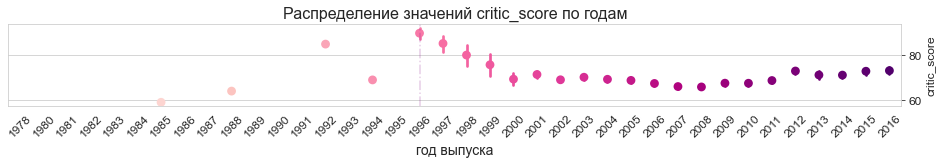

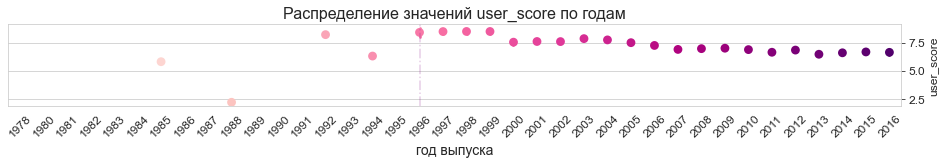

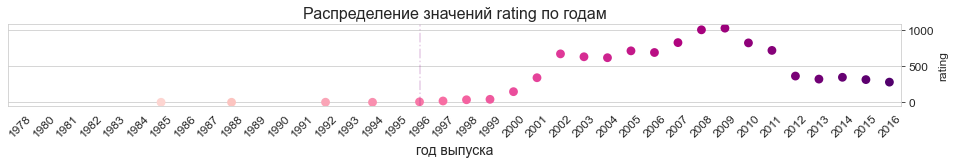

In [18]:
# посчитаем сумму рейтинговых оценок за каждый год
rating_counted = (df.groupby('year_of_release')[
                  'rating'].count().reset_index().replace(0, np.nan)
                  )

# выведем графики по critic_score, user_score и rating
score_plot(df, 'critic_score')
score_plot(df, 'user_score')
score_plot(rating_counted, 'rating')

Некоторые ключевые события игровой индустрии в хронологическом порядке:

* 16 сентября 1994 года основана ESRB (Entertainment Software Rating Board).


* 11 мая 1995 состоялась первая выставка E3 (Electronic Entertainment Expo) англ. «Выставка электронных развлечений». 


* в 1998 году состоялась первая ежегодная церемония вручения наград Game Critics Awards.

Даты и графики указывают на то, что в 1994-96 годах игровая индустрия переживала бурный рост. Кроме того, все три события связаны с Северной Америкой. Логично предположить, что существует связь между частью пропущенных значений в наших столбцах и перечисленными событиями.

Возможно игры стали регулярно оцениваться и получать рейтинговые оценки только после 1995 года, а некоторые из них были оценены в ретроспективе. Либо, данные содержат рейтинговую информацию в основном только по Северной Америке.

Чтобы судить с уверенностью, потребуется более глубоко погрузиться в тему. В этом проекте мы оставим пропуски как есть, без заполнения. Когда потребуется обратиться к этим столбцам, то возьмем только строки с заполненными ячейками.

#### `rating`

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США, Канаде и Мексике. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

> Поскольку графика видеоигр стала более реалистичной, правительство США провело слушания о влиянии игр контентом для взрослых на общество. И в результате выдвинули ультиматум игровой индустрии: придумать универсальную систему рейтингов. 

> Система рейтинга является добровольной, однако все производители консолей, а также некоторые розничные продавцы в США и мобильные или интернет-магазины должны иметь рейтинги ESRB для игр или приложений, которые они предлагают.

**Pan European Game Information (PEGI)** — европейская рейтинговая система компьютерных игр и другого развлекательного программного обеспечения. Была разработана Европейской федерацией интерактивного программного обеспечения и начала работу в апреле 2003 года. Система PEGI поддерживается Еврокомиссией, но не управляется Евросоюзом.

**Computer Entertainment Rating Organization (CERO)** — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт. Работает с июля 2002 года как ответвление Computer Entertainment Supplier's Association.

Некоторые другие рейтинговые системы:
* ACB (Австралия)
* RARS (Россия)
* USK (Германия)

> Австралия заслуживает особого внимания за введение жёсткой цензуры по сравнению с другими западными странами. Австралийский классификационный совет не поддерживал введение рейтинга 18+ для видеоигр до 2013 года. Некоторые игры никогда не выпускались в Австралии, в то время как другие были подвержены редактированию.

>Например, в Fallout 3 реальный препарат морфина в мире был заменен на «Med-X», чтобы соответствовать австралийским стандартам. В Австралии запрещено продавать игры, которым было отказано в классификации.

Пропуски в `rating` заполним плейсхолдером.

In [19]:
# заполним пропуски в rating плейсхолдером
df.rating = df.rating.fillna('n/a')

### Подсчёт суммарных продаж

In [20]:
# создадим столбец с суммой продаж по всем регионам
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

# проверим результат
dis(df[['name', 'na_sales', 'eu_sales', 'jp_sales',
        'other_sales', 'total_sales']].sample(5))

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
3825,Tiger Woods PGA Tour 11,0.28,0.19,0.00,0.05,0.52
6552,Tom Clancy's Splinter Cell: Double Agent,0.20,0.03,0.00,0.03,0.26
2327,Classic NES Series: The Legend of Zelda,0.46,0.17,0.24,0.02,0.89
7499,The King of Fighters '95,0.00,0.00,0.20,0.00,0.20
4158,Hot Wheels Velocity X,0.23,0.18,0.00,0.06,0.47


### Вывод

1. Мы привели названия столбцов к нижнему регистру и заменили типы в `year_of_release` и `user_score`.


2. Заполнили пропуски в `name`, `genre` и `year_of_release`, и оставили пропуски в `critic_score`, `user_score` ввиду отсутствия адекватного способа восстановить эту информацию, возможно она вообще не существует. Пропуски в `rating` заполнили плейсхолдером `n/a` для удобства в дальнейшем.


3. Завели столбец `total_sales` с суммой продаж по всем регионам.


Предобработка закончена, можно переходить к следующему шагу.

## Шаг 3. Исследовательский анализ данных

### Карманные консоли и ПК

В 2009 году карманные консоли вступили в конкурентную борьбу со смартфонами, которую к 2016 году успешно проиграли.

В рамках исследования топ-10 популярных платформ мы один раз исключим карманные консоли и ПК из анализа, для более точного вычисления длины жизненного цикла и подсчёта цикличности появления новых консолей.

In [21]:
# заведем список карманных консолей
handheld = ['3DS', 'DS', 'GB', 'GBA', 'GG', 'PSP', 'PSV', 'WS']

### Сколько игр выпускалось в разные годы

Посмотрим, сколько игр выпускалось в разные годы. Решим, важны ли данные за все периоды.

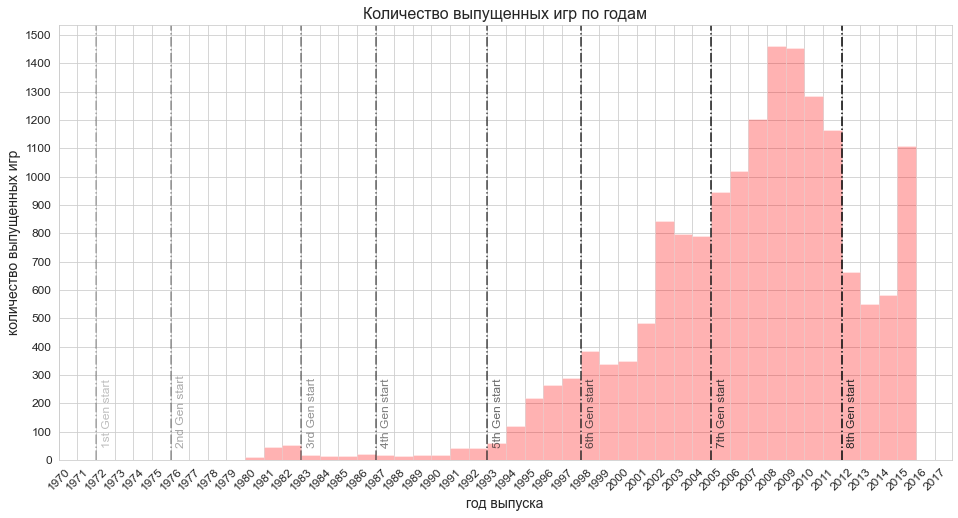

In [22]:
# построим гистограмму по полному датафрейму
ax = df.hist('year_of_release', bins=38, color='red', alpha=0.3)

# зададим заголовок и названия осей
plt.title('Количество выпущенных игр по годам', fontsize=16)
plt.xlabel('год выпуска', fontsize=14)
plt.ylabel('количество выпущенных игр', fontsize=14)

# зададим более информативные тики
plt.xticks(range(1970, 2018, 1))
plt.yticks(range(0, 1600, 100))
plt.xticks(rotation='45')

# сформируем список с параметрами линий
preset = [
    [1972, '1st Gen start', 0.3],
    [1976, '2nd Gen start', 0.4],
    [1983, '3rd Gen start', 0.5],
    [1987, '4th Gen start', 0.6],
    [1993, '5th Gen start', 0.7],
    [1998, '6th Gen start', 0.8],
    [2005, '7th Gen start', 0.9],
    [2012, '8th Gen start', 1]]

# добавим вертикальные линии на график
for row in preset:
    plt.axvline(x=row[0], color='black', linestyle='-.', alpha=row[2])
    plt.text(row[0]+0.3, 50, row[1], rotation=90, size=12, alpha=row[2])

# выведем график
plt.show()

* C 1972 по 2017 год насчитывается 8 поколений игровых консолей.


* В качестве актуального периода, предлагаю взять для анализа только **восьмое поколение**, которое начинает отсчтёт **с 2012 года**.

### Как менялись продажи по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Подсчитаем за какой характерный срок появляются новые и исчезают старые платформы. Не будем учитывать ПК.


* Для расчёта срока появления новых платформ посчитаем расстояние между годами выпуска. Если в один год было выпущено больше одной консоли, то будет принимать их за одну.


* Для расчёта жизненного цикла посчитаем дельту между годом выпуска последней и первой игры для платформы.

In [23]:
# инициализируем функцию для расчётов
def platform_lifecycle(array):

    # создадим списки для хранения промежуточных результатов
    lifecycle = []
    appearance_years = []
    distance = []

    # переберем платформы в цикле и посчитаем срок жизни
    for platform in array:
        data = df.query('platform == @platform')
        y_min = data.year_of_release.min()
        y_max = data.year_of_release.max()

        # добавим результат в список
        lifecycle.append(y_max - y_min)
        appearance_years.append(y_min)

    # уберем повторяющиеся года, отсортируем по возрастанию
    appearance_years = sorted(list(set(appearance_years)))
    
    # вычислим расстояния между годами в цикле
    for i in range(len(appearance_years)-1):
        curr = appearance_years[i]
        next_ = appearance_years[i+1]
        distance.append(next_ - curr)

    # выведем сообщения с результатами
    print(f"Новые платформы появляются в среднем каждые {np.mean(distance):.1f} года")
    print(f"Характерный срок жизни игровой платформы составляет {np.median(lifecycle)} лет")

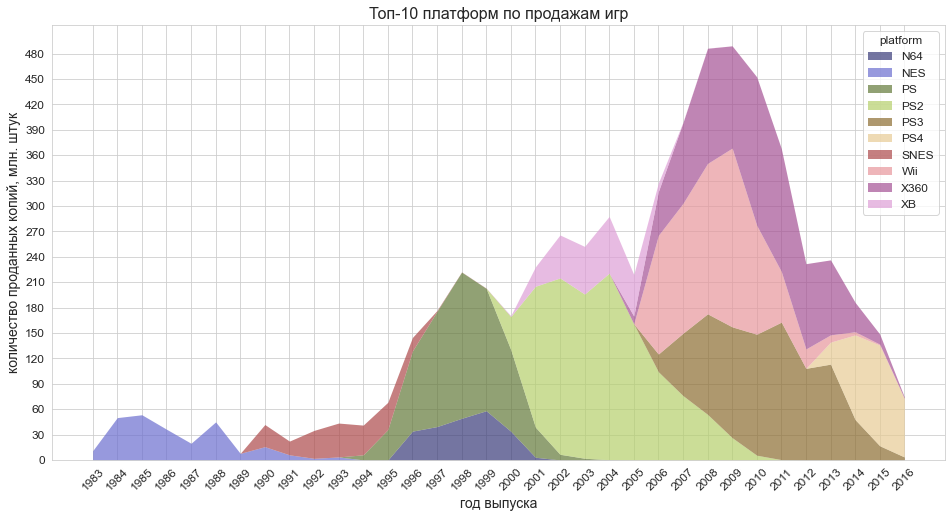

Новые платформы появляются в среднем каждые 4.3 года
Характерный срок жизни игровой платформы составляет 9.5 лет


In [24]:
# сформируем список с названиями платформ из топ-10 по продажам, не включая ПК и карманные консоли
top10_platforms_by_sales = (df
                            .query('platform not in @handheld and platform != "PC"')
                            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                            .sort_values(by='total_sales', ascending=False)
                            .reset_index().head(10).platform
                            )

# сделаем срез полного датафрейма по списку платформ из топ-10
data = (df
        .query('platform in @top10_platforms_by_sales')
        .pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
        )

# зададим названия осей и тики
data.plot.area(linewidth=0, cmap='tab20b', alpha=0.7)
plt.title('Топ-10 платформ по продажам игр', fontsize=16)
plt.xlabel('год выпуска', fontsize=14)
plt.ylabel('количество проданных копий, млн. штук', fontsize=14)
plt.xticks(range(1983, 2017, 1))
plt.yticks(range(0, 500, 30))
plt.xticks(rotation='45')

# выведем график и информацию о жизненном цикле

plt.show()
platform_lifecycle(top10_platforms_by_sales)

### Рост и падение, потенциально прибыльные платформы

Возьмем данные за соответствующий актуальный период. Актуальный период мы определили в результате исследования предыдущих вопросов. Будем считать, что игра активнее всего продается в первый год после выпуска и не будем учитывать игры выпущенные до 2012 года.

Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

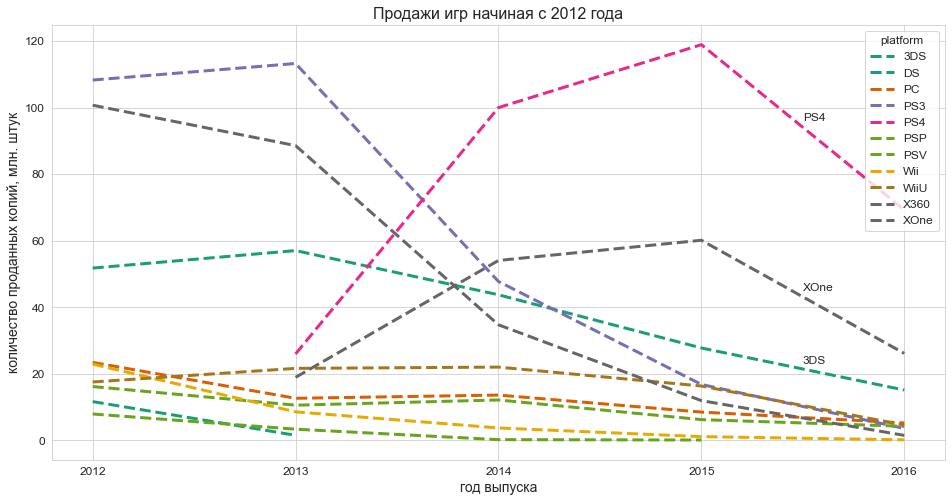

In [25]:
# сделаем срез полного датафрейма по релизам начиная с 2012 года
data = (df.query('year_of_release >= 2012')
        .pivot_table(index='year_of_release', values='total_sales',
                     columns='platform', aggfunc='sum')
        )

# зададим параметры графика и названия осей
data.plot(linewidth=3, style="--", grid=True, cmap='Dark2')
plt.title('Продажи игр начиная с 2012 года', fontsize=16)
plt.xlabel('год выпуска', fontsize=14)
plt.ylabel('количество проданных копий, млн. штук', fontsize=14)

# настроим тики
plt.xticks(range(2012, 2017, 1))
plt.text(x=2015.5, y=96, s='PS4')
plt.text(x=2015.5, y=45, s='XOne')
plt.text(x=2015.5, y=23, s='3DS')

# выведем график
plt.show()

* **PS4**, **XOne** и **3DS** лидируют по количеству проданных игр. Мы видим перелом тренда для **PS4** и **XOne**, однако данные за 2016 могут быть неполными. При характерном жизненном цикле в 9,5 лет можно предполагать, что топовые консоли останутся актуальны минимум до 2021 года.


* **DS**, **PC**, **PS3**, **PSP**, **PSV**, **Wii**, **Wii U** и **X360** показывают низкие продажи. Среди них можно найти консоли прошлых поколений и карманные устройства, которые как мы знаем проиграли в конкурентной борьбе смартфонам.

### «Ящик с усами» по топ-3 платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

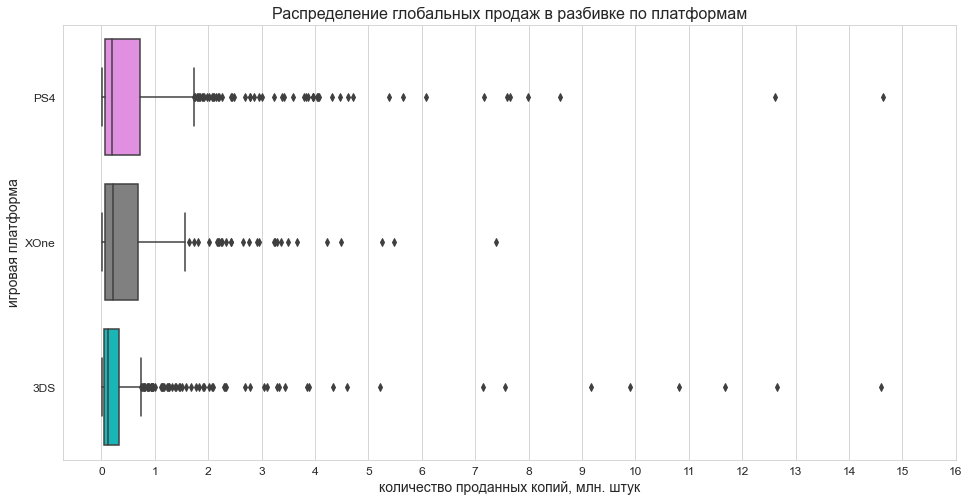

In [26]:
# выберем топовые платформы из прошлого шага
selection = ['PS4', 'XOne', '3DS']

# сделаем срез по выбранным платформам
data = df.query('platform in @selection')

# сформируем график
sns.boxplot(x="total_sales", y="platform", data=data,
            order=selection, palette=['violet', 'grey', 'darkturquoise'])

# зададим заголовок и названия осей
plt.title('Распределение глобальных продаж в разбивке по платформам', fontsize=16)
plt.ylabel('игровая платформа', fontsize=14)
plt.xlabel('количество проданных копий, млн. штук', fontsize=14)

# настроим тики
plt.xticks(range(0, 17, 1))

# выведем график
plt.show()

* Судя длинному усу вправо, на **PS4** вышло больше всего популярных игр. Следом идёт **XOne** и замыкает тройку **3DS**.


* Медианное значение количества проданных игр для **PS4** и **XOne** почти одинаковое.


* Для **3DS** медианное значение сильно левее. Тем не менее, на этой платформе вышло как минимум 6 игр с количеством продаж от 9 млн. копий. Две другие консоли таким похвастаться не могут.

### PS4: влияние отзывов критиков и пользователей

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [27]:
# инициализируем функцию для интерпретации коэффициента корреляции
def corr_level(corr):

    # направленность
    if corr > 0:
        corr_type = 'положительная'
    elif corr < 0:
        corr = abs(corr)
        corr_type = 'отрицательная'
    else:
        return 'корреляция отсутствует'

    # мощность
    if 0 < corr < 0.3:
        cardinality = 'очень слабая'
    if 0.3 <= corr < 0.5:
        cardinality = 'слабая'
    if 0.5 <= corr < 0.7:
        cardinality = 'средняя'
    if 0.7 <= corr < 0.9:
        cardinality = 'высокая'
    if 0.9 <= corr <= 1:
        cardinality = 'очень высокая'

    # вывод
    return f"{cardinality} {corr_type} корреляция"

In [28]:
# инициализируем функцию для вывода графиков и подсчёта корреляции
def score_corr(platform, score, color):

    # выберем колонки
    columns = ['total_sales', score]

    # сделаем срез по выбранной платформе
    data = df.query('platform == @platform', engine='python')

    # построим график
    plot = sns.jointplot(y=columns[0], x=columns[1], data=data,
                         kind='kde', color=color)

    # добавим заголовок и подгоним под него размер графика
    plot.fig.suptitle(
        f'{platform}: влияние {columns[1]} на количество продаж', fontsize=16, y=1.05)
   
    # выведем график
    plt.show()

    # рассчитаем коэффициент корреляции Пирсона
    corr = round(data[columns].corr().iloc[0, 1], 2)
    print(
        f"r-Пирсона между {columns[0]} и {columns[1]} равен {corr}: {corr_level(corr)}.")

#### `critic_score`

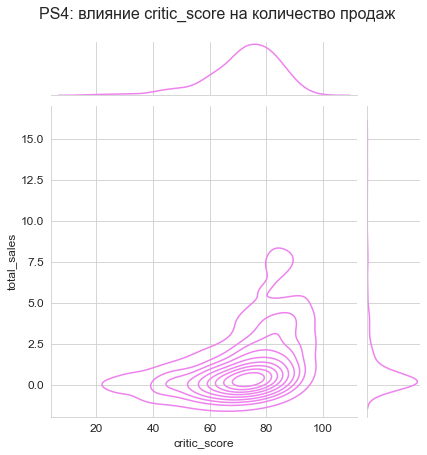

r-Пирсона между total_sales и critic_score равен 0.41: слабая положительная корреляция.


In [29]:
score_corr('PS4', 'critic_score', 'violet')

#### `user_score`

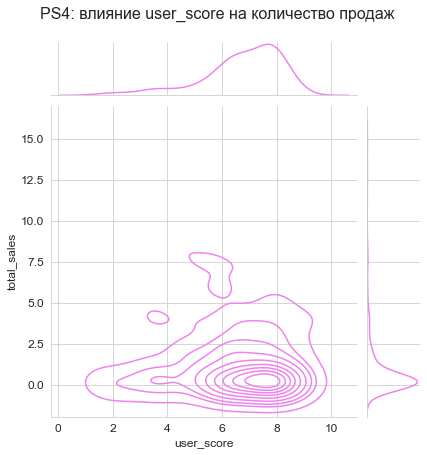

r-Пирсона между total_sales и user_score равен -0.03: очень слабая отрицательная корреляция.


In [30]:
score_corr('PS4', 'user_score', 'violet')

**PS4**: оценки пользователей никак не коррелируют, а оценки от критиков слабо положительно коррелируют с уровнем продаж.

### XOne: влияние отзывов критиков и пользователей

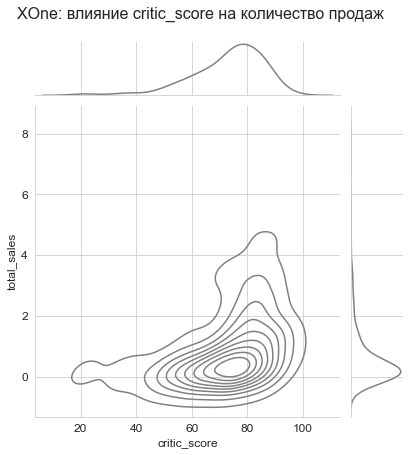

r-Пирсона между total_sales и critic_score равен 0.42: слабая положительная корреляция.


In [31]:
score_corr('XOne', 'critic_score', 'grey')

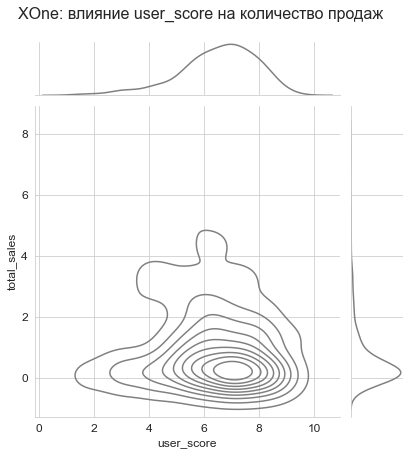

r-Пирсона между total_sales и user_score равен -0.07: очень слабая отрицательная корреляция.


In [32]:
score_corr('XOne', 'user_score', 'grey')

**XOne**: оценки пользователей очень слабо обратно коррелируют, а оценки от критиков слабо положительно коррелируют с уровнем продаж.

### 3DS: влияние отзывов критиков и пользователей

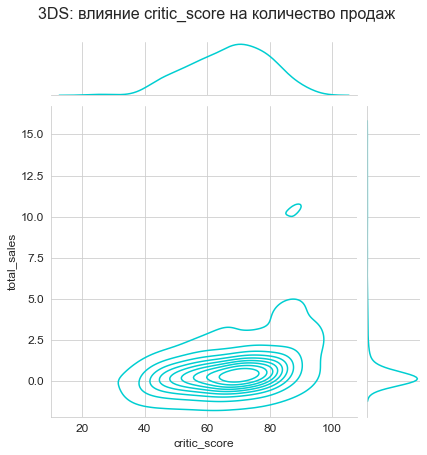

r-Пирсона между total_sales и critic_score равен 0.35: слабая положительная корреляция.


In [33]:
score_corr('3DS', 'critic_score', 'darkturquoise')

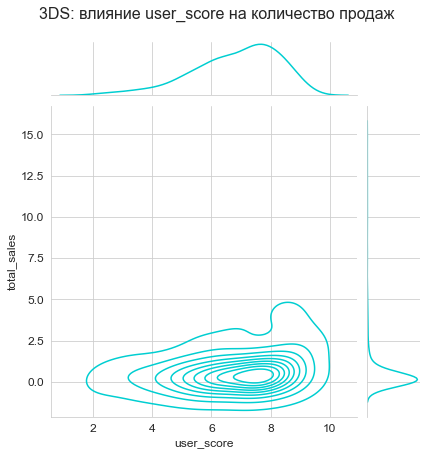

r-Пирсона между total_sales и user_score равен 0.22: очень слабая положительная корреляция.


In [34]:
score_corr('3DS', 'user_score', 'darkturquoise')

**3DS**: оценки пользователей очень слабо обратно коррелируют, а оценки от критиков слабо положительно коррелируют с уровнем продаж.

Только для **3DS** обнаруживается хоть сколько-нибудь существенная корреляция между пользовательскими оценками и уровнем продаж.

### Прибыльность разных жанров

Посмотрим на общее распределение игр по жанрам. Выделим жанры с высокими и низкими продажами.

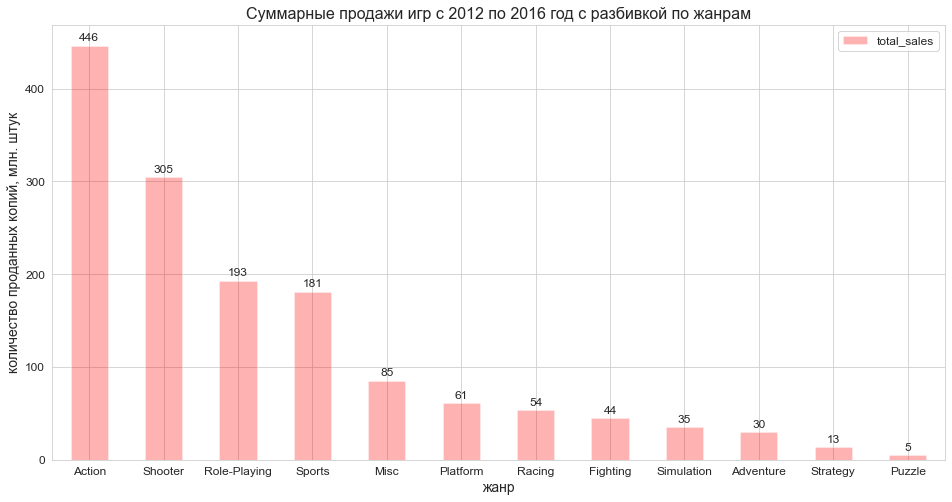

In [35]:
# подготавливаем таблицу
data = (df
        .query('year_of_release >= 2012')
        .groupby('genre')
        .sum()
        .total_sales
        .reset_index()
        .sort_values(by='total_sales', ascending=False)
        )

# сформировываем график
data.plot(kind='bar', x='genre', color='red', alpha=0.3)

# добавим численные значения столбцам
for i, v in enumerate(sorted(data.total_sales, reverse=True)):
    plt.text(i, v+5, round(v), ha='center')

# добавляем название и подписи осей
plt.title('Суммарные продажи игр с 2012 по 2016 год с разбивкой по жанрам', fontsize=16)
plt.xlabel('жанр', fontsize=14)
plt.ylabel('количество проданных копий, млн. штук', fontsize=14)
plt.xticks(rotation='0')

# выведем график и информацию о жизненном цикле
plt.show()

* На первых местах по продажам **Action** и **Shooter** игры.

> Экшен (action в переводе с англ. — «действие») — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции.

> Шу́тер (Стрелялка, англ. shooter — «стрелок») — жанр компьютерных игр, подкатегория экшен-игр. На момент зарождения жанра за рубежом укрепилось слово «шутер», как вариант описания игрового процесса и перевод для слова shooter, в России и некоторых других странах постсоветского пространства жанр изначально был назван как «стрелялка». 

* На последних двух местах **Strategy** и **Puzzle** игры.

> Стратегическая игра — жанр компьютерных игр, в которых игроку для победы необходимо применять стратегическое мышление. В популярных играх такого жанра игроку предлагается играть не за конкретного персонажа, а за их условные массы, к примеру, руководить строительством города или командовать целыми армиями в военных кампаниях.

> Головоломка (англ. Puzzle) — название жанра компьютерных игр, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции.

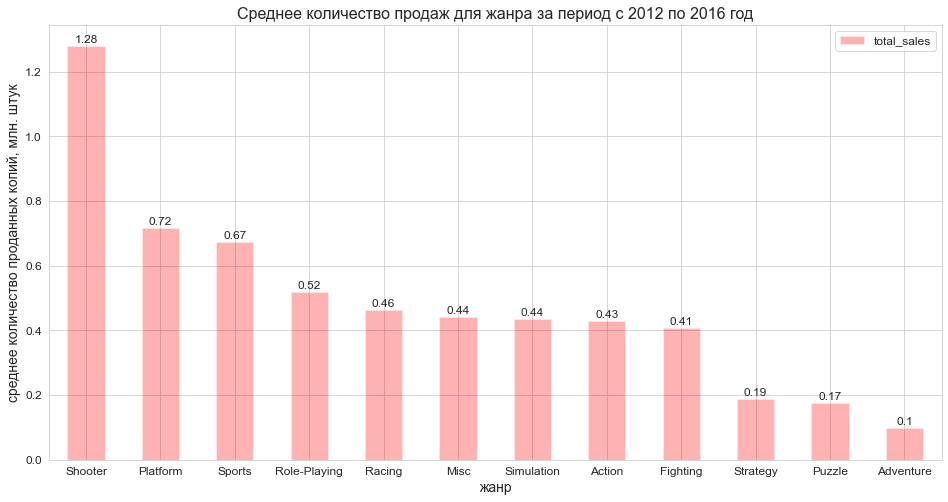

In [36]:
# подготавливаем таблицу
data = (df
        .query('year_of_release >= 2012')
        .groupby('genre')
        .mean()
        .total_sales
        .reset_index()
        .sort_values(by='total_sales', ascending=False)
        )

# сформировываем график
data.plot(kind='bar', x='genre', color='red', alpha=0.3)

# добавим численные значения столбцам
for i, v in enumerate(sorted(data.total_sales, reverse=True)):
    plt.text(i, v+0.01, round(v, 2), ha='center')

# добавляем название и подписи осей
plt.title('Среднее количество продаж для жанра за период с 2012 по 2016 год', fontsize=16)
plt.xlabel('жанр', fontsize=14)
plt.ylabel('среднее количество проданных копий, млн. штук', fontsize=14)
plt.xticks(rotation='0')

# выведем график и информацию о жизненном цикле
plt.show()

Если посмотреть среднее количество продаж по жанрам, то в первой тройке окажутся жанры **Shooter**, **Platform** и **Sports**.

### Вывод

На конец 2016 года остаются актуальны платформы **7-го** (2005 г.в., цикл заканчивается) и **8-го** (2012 г.в., цикл продожается) поколений. 

* Самые популярные – **Playstation 4** (лидирует по глобальным продажам), **XBox One** и **3DS**.

Уровень продаж слабо положительно коррелируют с оценками от критиков, и только в случае с **3DS** очень слабо положительно коррелирует с оценками пользователей. В случаях с **Playstation 4** и **XBox One** корелляция с оценками пользователей почти совсем отсутствует.

* Характерный срок жизни платформы составляет 9.5 лет.


* Новые популярные платформы появляются в среднем каждые 4.3 года.


* На первых местах по глобальным продажам **Action** и **Shooter** игры на западе, и **Role Playing Games** на востоке.

## Шаг 4. Портрет пользователя по регионам

In [37]:
# инициализируем функцию для вывода графиков
def triple_pie_chart(data, title, p_title):

    labels = data.index.tolist()
    size = data.count()[0]
    columns = data.columns.to_list()

    # определим цвета
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cc99dd'][:size]

    # взрыв
    explode = (0.05, 0.05, 0.05, 0.05, 0.05)[:size]

    fig, axs = plt.subplots(1, 3, figsize=(16, 5))

    for num, column in enumerate(columns):

        sizes = data[column].tolist()

        axs[num].pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
                     startangle=90, explode=explode, pctdistance=0.75)

        axs[num].set_title(p_title[num], fontsize=14)

    # общий заголовок
    plt.suptitle(title, y=1.05)

    # выведем графики
    plt.show()

### Популярные платформы

Определим доли 5-ти самых популярных платформ в разных регионах. Опишем различия.

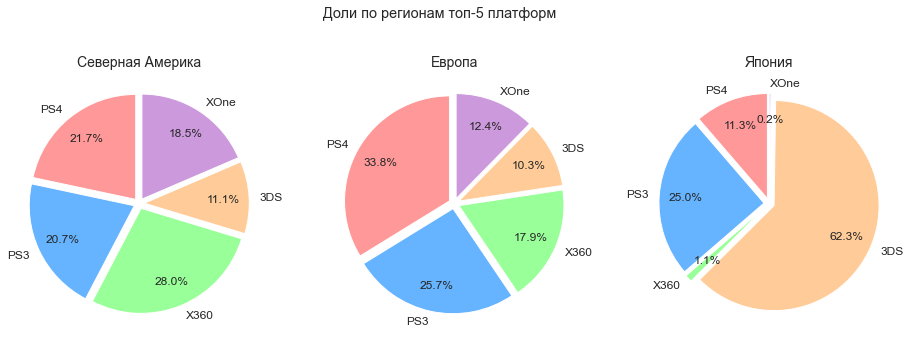

In [38]:
# сформируем сводную таблицу
data = (df.query('year_of_release >= 2012').groupby('platform').sum()
        .sort_values('total_sales', ascending=False)
        [['na_sales', 'eu_sales', 'jp_sales']].head(5)
        )

# выведем графики
triple_pie_chart(data, 'Доли по регионам топ-5 платформ',
                 ['Северная Америка', 'Европа', 'Япония'])

* В **Северной Америке** лидирует **X360**, занимает 3-е место в Европе, 4-ое место в Японии.


    * Суммарно лидирует Xbox последних двух поколений с общей долей 46,5% против 42,4% у Playstation.


* В **Европе** лидирует **PS4**, занимает 2-ое место в Северной америке и 3-е место в Японии.


    * Суммарно лидирует Playstation последних двух поколений с общей долей 59,5% против 30,3% у Xbox


* В **Японии** лидирует **3DS**, занимает последние места в Северной Америке и Европе.


    * Второе место занимает Playstation с 36,3% в сумме долей, Xbox представлен лишь долями процента.

### Популярные жанры

Определим доли 5-ти самых популярных жанров в разных регионах. Поясним разницу.

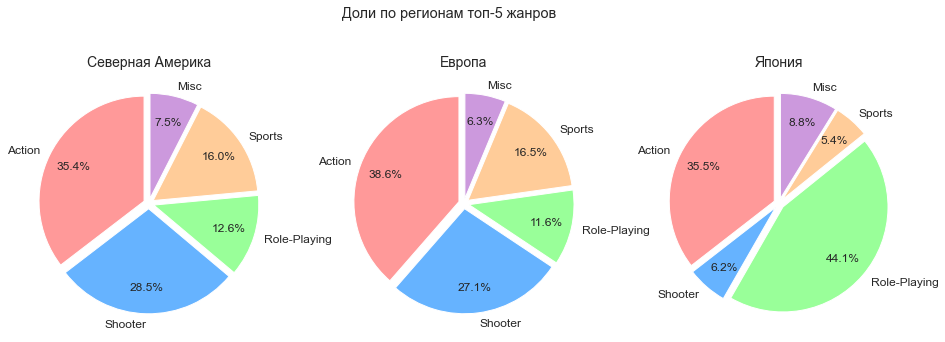

In [39]:
# сформируем сводную таблицу
data = (df
        .query('year_of_release >= 2012').groupby('genre').sum()
        .sort_values('total_sales', ascending=False)
        [['na_sales', 'eu_sales', 'jp_sales']].head(5)
        )

# выведем графики
triple_pie_chart(data, 'Доли по регионам топ-5 жанров',
                 ['Северная Америка', 'Европа', 'Япония'])

* Доли топовых жанров в **Северной Америке** и **Европе** отличаются несущественно.


* В **Японии** лидируют **Role Playing Games**, **Action**-игры на втором месте.

> Есть много причин, по которым ролевые игры более популярны в Японии, чем шутеры от первого лица. Одна из основных причин заключается в том, что Япония имеет долгую и славную историю ролевых игр, таких как «Dragon Quest» или «Final Fantasy». Прошлые успехи страны в ролевых играх продолжают увековечивать этот цикл. Другая причина заключается в том, что шутеры родились и выросли на ПК в Америке в 1990-е годы – время, когда Япония была полностью очарована ролевыми играми на домашних консолях. Поскольку ролевые игры были крайне популярны, локальные производители видеоигр не прилагали усилий для разработки собственных шутеров.

### Влияние рейтинга ESRB по регионам

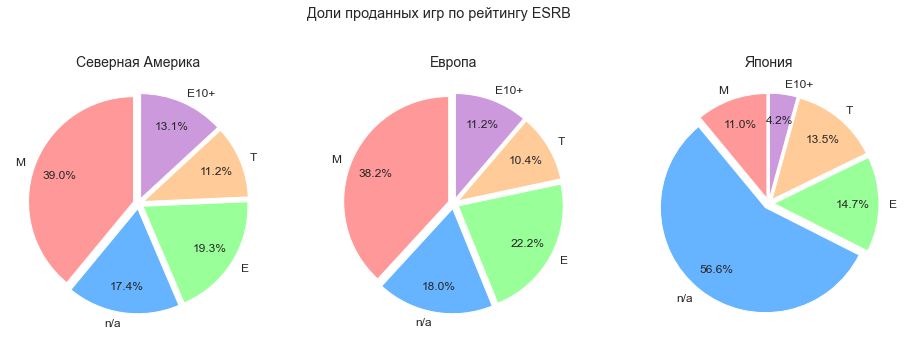

In [40]:
# сформируем сводную таблицу
data = (df
        .query('year_of_release >= 2012').groupby('rating').sum()
        .sort_values('total_sales', ascending=False)
        [['na_sales', 'eu_sales', 'jp_sales']].head(5)
        )

# выведем графики
triple_pie_chart(data, 'Доли проданных игр по рейтингу ESRB',
                 ['Северная Америка', 'Европа', 'Япония'])

* В **Северной Америке** и **Европе** в лидерах игры с рейтингом **M** (возраст 17+), на втором месте рейтинг **E** (все возраста). Распределения отличаются незначительно.


* В **Японии** на первых двух местах игры с рейтингами **T** (возраст 13+) и **E** (все возраста). Больше половины продаваемых в Японии игр не имеют рейтинга **ESRB**, эти игры либо не проходили оценку (рейтинг носит добровольный характер), либо не выпускались на территории Северной Америки.


* UPD: В **Японии** своя система - Computer Entertainment Rating Organization (CERO)

### Вывод

Портрет игрока на западе и востоке существенно различается:


* В **Северной Америке** Xbox популярнее чем Playstation, но платформы близки к паритету.


* В **Европе** Playstation популярнее XBox с перевесом в 2 раза.


* На западе в лидерах игры в жанрах **Action** и **Shooter** с рейтингом **Mature**.


* В **Японии** полулярен 3DS, а XBox почти не представлен. В топе по продажам **RPG**-игры, на втором месте **Action**. Существенную долю продаж составляют игры без рейтинга **ESRB**, а значит в Японии более популярны игры не из Северной Америки.

## Шаг 5. Проверка гипотез

In [41]:
# функция для сравнения дисперсий
def var_test(array1, array2):
    '''
    Тест Левена на гомогенность дисперсий. Этот тест определяет уровень значимости различий
    дисперсии групп. При р > 0,05 различие дисперсии между данными группами не значимо,
    следовательно, их можно рассматривать как гомогенные.
    '''

    stat, p = st.levene(array1, array2)
    
    if p > 0.05:
        print('Теста Левена: дисперсии гомогенные')
    else:
        print('Тест Левена: дисперсии не гомогенные')

In [42]:
# функция для сравнения средних
def ttest(array1, array2, equal_var=False):

    # зададим критический уровень статистической значимости
    alpha = 0.05

    # проверим гипотезу о равенстве средних двух независимых совокупностей
    results = st.ttest_ind(array1, array2, equal_var=equal_var)
    results_u = st.mannwhitneyu(array1, array2)

    # выведем на экран получившиеся p-значения
    print('p-уровень значимости t-test:', results.pvalue)
    print('p-уровень значимости u-test:', results_u.pvalue)
    print()

    # сравним получившееся t-test p-значение с заданным уровнем статистической значимости
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не удалось отвергнуть нулевую гипотезу")

### О средних пользовательских рейтингах платформ Xbox One и PC

In [43]:
# сравним дисперсии выборок
array1 = df.query('platform == "XOne" and ~user_score.isna()',
                  engine='python')['user_score']
array2 = df.query('platform == "PC" and ~user_score.isna()',
                  engine='python')['user_score']

var_test(array1, array2)

Теста Левена: дисперсии гомогенные


* **H₀** всегда формулируется так, чтобы использовать знак равенства.


* Сформулируем **нулевую гипотезу H₀**: `Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые`.


* Сформулируем **альтернативную гипотезу H₁**: `Cредние пользовательские рейтинги платформ Xbox One и PC разные`.


* Будем считать, что **H₀** можно отвергнуть при `p-уровне значимости < alpha = 0,05`. Это не строгая величина alpha.


* Для проверки гипотезы о равенстве двух средних будем использовать **t-тест Стьюдента**, решение будем принимать по нему. Как альтернативу мы могли бы использовать дисперсионный анализ **ANOVA**, однако в этом нет нужды на двух выборках с большим количеством наблюдений.


* Дисперсии выборок существенно не различаются, применим аргумент `equal_var=True`.


* Также выполним сравнение с использованием непараметрического **U-теста по методу Манна и Уитни**, для валидации результата.

In [44]:
ttest(array1, array2, equal_var=True)

p-уровень значимости t-test: 1.3896435533548819e-05
p-уровень значимости u-test: 6.205360417589671e-09

Отвергаем нулевую гипотезу


#### Вывод

Полученное **p-value** говорит о том, что вероятность получить такое или еще бОльшее различие равно **1.39 * 10 в -5 степени**. Это явно слишком малая вероятность, чтобы принять нулевую гипотезу.

Принимаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC разные.

### О средних пользовательских рейтингах жанров Action и Sports

In [45]:
# сравним дисперсии выборок
array1 = df.query('genre == "Action" and ~user_score.isna()',
                  engine='python')['user_score']
array2 = df.query('genre == "Sports" and ~user_score.isna()',
                  engine='python')['user_score']

var_test(array1, array2)

Тест Левена: дисперсии не гомогенные


* **H₀** всегда формулируется так, чтобы использовать знак равенства.


* Сформулируем **нулевую гипотезу H₀**: `Средние пользовательские рейтинги жанров Action и Sports одинаковые`.


* Сформулируем **альтернативную гипотезу H₁**: `Средние пользовательские рейтинги жанров Action и Sports разные`.


* Будем считать, что **H₀** можно отвергнуть при `p-уровне значимости < alpha = 0,05`. Это не строгая величина alpha.


* Для проверки гипотезы о равенстве двух средних будем использовать **t-тест Стьюдента**, решение будем принимать по нему. Как альтернативу мы могли бы использовать дисперсионный анализ **ANOVA**, однако в этом нет нужды на двух выборках с большим количеством наблюдений.


* Дисперсии выборок существенно различаются, применим аргумент `equal_var=False`.


* Также выполним сравнение с использованием непараметрического **U-теста по методу Манна и Уитни**, для валидации результата.

In [46]:
ttest(array1, array2, equal_var=False)

p-уровень значимости t-test: 0.11483818791498286
p-уровень значимости u-test: 0.3590516668584349

Не удалось отвергнуть нулевую гипотезу


#### Вывод

Полученное значение **p-value** говорит о том, что с высокой вероятностью средние пользовательские рейтинги жанров **Action** и **Sports** не различаются.

## Общий вывод

Стоит делать ставку на консоли 8 поколения, они должны быть актуальны минимум до 2021 года.

Для каждого региона кампании нужно планировать по разному:

* В **Северной Америке** ключевыми платформами должны быть Xbox One и Playstation 4, жанры Action и Shooter с рейтингом Mature.


* В **Европе** стоит сосредоточиться на Xbox One, жанры Action и Shooter с рейтингом Mature.


* В **Японии** 3DS и Playstation, с играми в жанрах RPG и Action. Больше половины продаваемых в Японии игр не имеют рейтинга **ESRB**, а значит там популярны игры не северо-американского производства.


В результате проверки гипотез мы выяснили:

* Средние пользовательские рейтинги платформ **Xbox One** и **PC** различаются.


* Средние пользовательские рейтинги жанров **Action** и **Sports** не различаются.